In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
data=pd.read_csv('/Users/aayushjain/codes/project/Fino/project 3/dataset_instagram-post-scraper_2024-03-02_11-52-27-554.csv')

In [204]:
data = data.dropna(axis=1, how='any')
print(data.head())

                                             caption  commentsCount  \
0  Introducing Our New and state-of-the-art branc...              0   
1  Step into a realm of unmatched luxury with Exc...              0   
2  We're thrilled to announce the grand relaunch ...              1   
3  Unveiling RuPay Zodiac Debit Cards for Exclusi...              2   
4  🎉 Today marks a historic day for us at @jana_s...             12   

   dimensionsHeight  dimensionsWidth  \
0              1080             1080   
1              1080             1080   
2              1080             1080   
3              1080             1080   
4               720             1080   

                                          displayUrl                   id  \
0  https://instagram.fltn3-2.fna.fbcdn.net/v/t51....  3314656629892642973   
1  https://scontent-lga3-1.cdninstagram.com/v/t51...  3307536599732136369   
2  https://scontent-mad2-1.cdninstagram.com/v/t51...  3310279905545157001   
3  https://instagram.fbo

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   caption           300 non-null    object
 1   commentsCount     300 non-null    int64 
 2   dimensionsHeight  300 non-null    int64 
 3   dimensionsWidth   300 non-null    int64 
 4   displayUrl        300 non-null    object
 5   id                300 non-null    int64 
 6   inputUrl          300 non-null    object
 7   isSponsored       300 non-null    bool  
 8   likesCount        300 non-null    int64 
 9   ownerFullName     300 non-null    object
 10  ownerId           300 non-null    int64 
 11  ownerUsername     300 non-null    object
 12  shortCode         300 non-null    object
 13  timestamp         300 non-null    object
 14  type              300 non-null    object
 15  url               300 non-null    object
dtypes: bool(1), int64(6), object(9)
memory usage: 35.6+ KB


In [206]:
def print_unique(column_name, unique_values):
    print(f"Column: {column_name}")
    print("Unique Values:")
    print(unique_values)
    print("\n")

for column in data.columns:
    unique_values = data[column].nunique()
    print_unique(column, unique_values)

Column: caption
Unique Values:
293


Column: commentsCount
Unique Values:
25


Column: dimensionsHeight
Unique Values:
23


Column: dimensionsWidth
Unique Values:
6


Column: displayUrl
Unique Values:
300


Column: id
Unique Values:
300


Column: inputUrl
Unique Values:
3


Column: isSponsored
Unique Values:
1


Column: likesCount
Unique Values:
187


Column: ownerFullName
Unique Values:
13


Column: ownerId
Unique Values:
13


Column: ownerUsername
Unique Values:
13


Column: shortCode
Unique Values:
300


Column: timestamp
Unique Values:
300


Column: type
Unique Values:
3


Column: url
Unique Values:
300




In [207]:
data.drop(['dimensionsHeight','dimensionsWidth','shortCode','ownerId','isSponsored','id','ownerUsername'],axis=1,inplace=True)

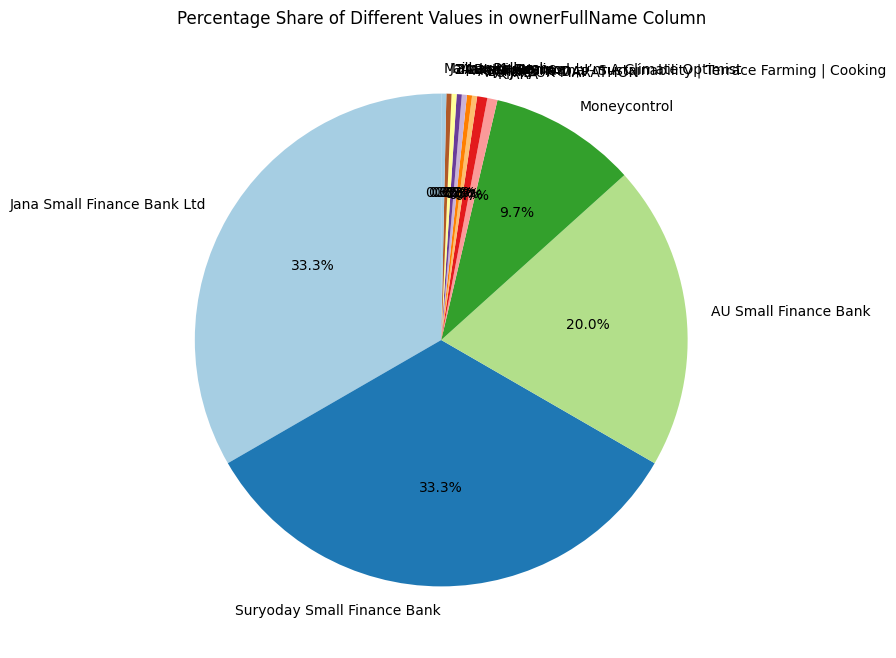

In [208]:
percentage_share = data['ownerFullName'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(percentage_share, labels=percentage_share.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage Share of Different Values in ownerFullName Column')
plt.show()

In [209]:
data[data['ownerFullName']=='Moneycontrol']['caption'].iloc[0]

'Dive into the story of the Chintan Foundation, an organization that stands as a beacon of hope for waste pickers in Delhi NCR. Led by Bharati Chaturvedi, Chintan not only manages significant amounts of waste daily but also focuses on the future of vulnerable communities by prioritizing children’s education, women’s empowerment, and sustainable livelihoods. AU Small Finance Bank presents #BadlaavHumseHai Season 2 in association with #Network18 \n\n#Partnered | @aubankindia @gulpanag'

In [210]:
specified_values = ['AU Small Finance Bank', 'Moneycontrol', 'Suryoday Small Finance Bank', 'Jana Small Finance Bank Ltd']

data['ownerFullName'] = data['ownerFullName'].apply(lambda x: x if x in specified_values else 'Other')

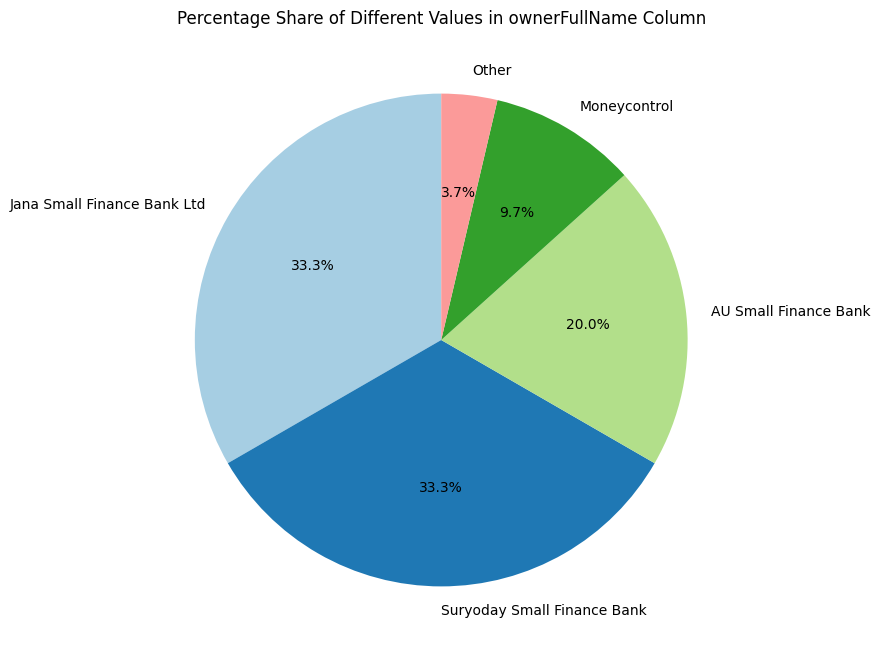

In [211]:
percentage_share = data['ownerFullName'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(percentage_share, labels=percentage_share.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage Share of Different Values in ownerFullName Column')
plt.show()

In [212]:
data.groupby('ownerFullName').describe()

commentsCount                                    \
                                    count        mean         std  min  25%   
ownerFullName                                                                 
AU Small Finance Bank                60.0    5.900000   16.922255  0.0  1.0   
Jana Small Finance Bank Ltd         100.0    0.620000    1.643967  0.0  0.0   
Moneycontrol                         29.0    2.310345    2.977336  0.0  1.0   
Other                                11.0  113.363636  205.447450  0.0  9.0   
Suryoday Small Finance Bank         100.0    2.090000    6.843260  0.0  0.0   

                                                likesCount                \
                              50%    75%    max      count          mean   
ownerFullName                                                              
AU Small Finance Bank         3.0   5.00  129.0       60.0    411.766667   
Jana Small Finance Bank Ltd   0.0   0.25   12.0      100.0     86.220000   
Moneycontrol                  1.0   2.00   13.0       29.0    377.827586   
Other                        12.0  86.50  630.0       11.0  37196.090909   
Suryoday Small Finance Bank   0.0   1.00   44.0      100.0    103.770000   

                                                                            \
                                      std    min     25%     50%       75%   
ownerFullName                                                                
AU Small Finance Bank          438.607054   82.0  134.25   220.5    486.25   
Jana Small Finance Bank Ltd     44.237098   23.0   59.75    78.0    106.25   
Moneycontrol                   249.121610  103.0  217.00   269.0    483.00   
Other                        77950.604472  382.0  703.00  1991.0  12110.50   
Suryoday Small Finance Bank     62.458043   24.0   58.00    88.0    131.00   

                                       
                                  max  
ownerFullName                          
AU Small Finance Bank          2031.0  
Jana Small Finance Bank Ltd     344.0  
Moneycontrol                   1230.0  
Other                        236113.0  
Suryoday Small Finance Bank     294.0

In [213]:
data.head()

,caption,commentsCount,displayUrl,inputUrl,likesCount,ownerFullName,timestamp,type,url
0,Introducing Our New and state-of-the-art branc...,0,https://instagram.fltn3-2.fna.fbcdn.net/v/t51....,https://www.instagram.com/jana_small_finance_b...,73,Jana Small Finance Bank Ltd,2024-03-02T05:39:49.000Z,Video,https://www.instagram.com/p/C4ABqShJPid/
1,Step into a realm of unmatched luxury with Exc...,0,https://scontent-lga3-1.cdninstagram.com/v/t51...,https://www.instagram.com/jana_small_finance_b...,64,Jana Small Finance Bank Ltd,2024-02-21T09:51:49.000Z,Image,https://www.instagram.com/p/C3muwNsoymx/
2,We're thrilled to announce the grand relaunch ...,1,https://scontent-mad2-1.cdninstagram.com/v/t51...,https://www.instagram.com/jana_small_finance_b...,84,Jana Small Finance Bank Ltd,2024-02-25T04:42:17.000Z,Image,https://www.instagram.com/p/C3wegkVIfmJ/
3,Unveiling RuPay Zodiac Debit Cards for Exclusi...,2,https://instagram.fbog14-1.fna.fbcdn.net/v/t51...,https://www.instagram.com/jana_small_finance_b...,134,Jana Small Finance Bank Ltd,2024-02-22T10:49:44.000Z,Video,https://www.instagram.com/p/C3paBEIJh-h/
4,🎉 Today marks a historic day for us at @jana_s...,12,https://instagram.flwo4-2.fna.fbcdn.net/v/t51....,https://www.instagram.com/jana_small_finance_b...,344,Jana Small Finance Bank Ltd,2024-02-14T08:15:43.000Z,Sidecar,https://www.instagram.com/p/C3UiMJqM2rP/


In [214]:
import langid
def classify_language(message):
    if isinstance(message, str): 
        lang, _ = langid.classify(message)
        if lang == 'hi':
            return 0 
        elif lang == 'en':
            return 2 
        else:
            return 1  
    else:
        return np.nan  

data['Language_Category'] = data['caption'].apply(classify_language)

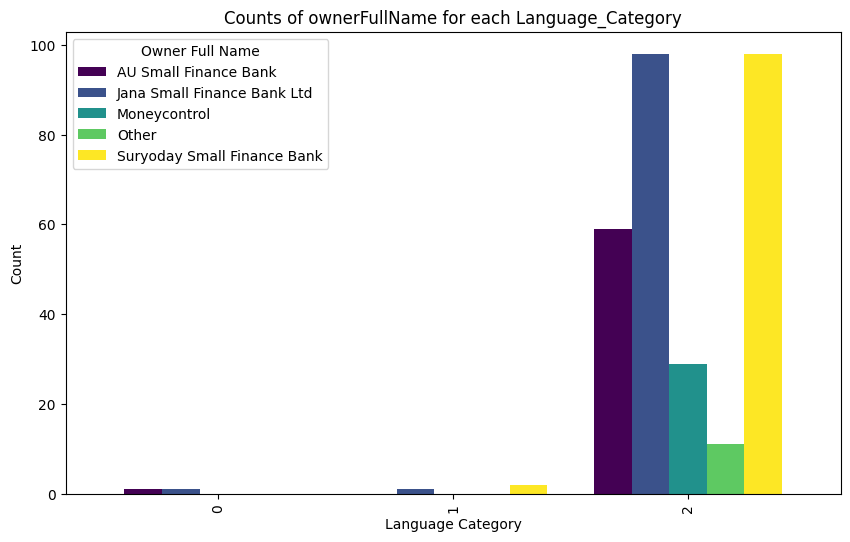

In [215]:
grouped_counts = data.groupby(['Language_Category', 'ownerFullName']).size().unstack()

grouped_counts.plot(kind='bar', figsize=(10, 6), width=0.8, colormap='viridis')

plt.title('Counts of ownerFullName for each Language_Category')
plt.xlabel('Language Category')
plt.ylabel('Count')
plt.legend(title='Owner Full Name')

plt.show()

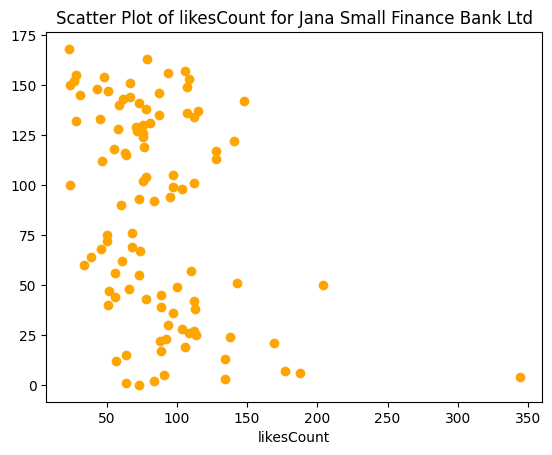

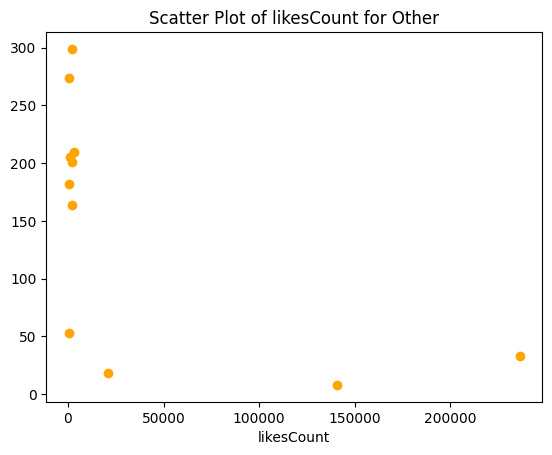

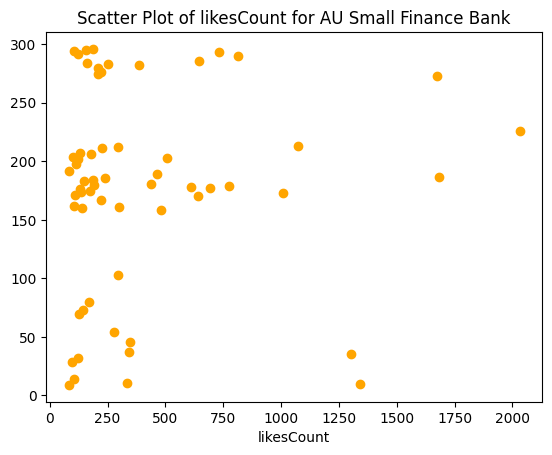

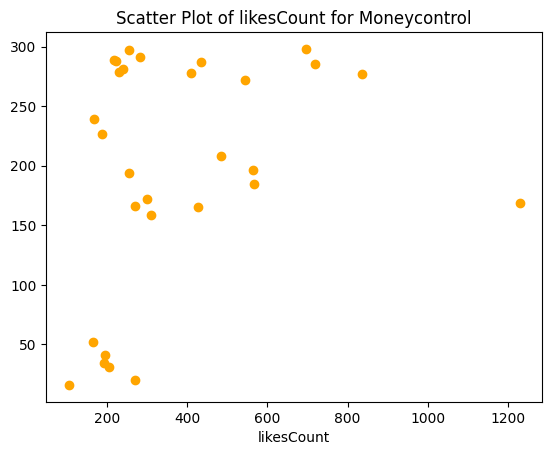

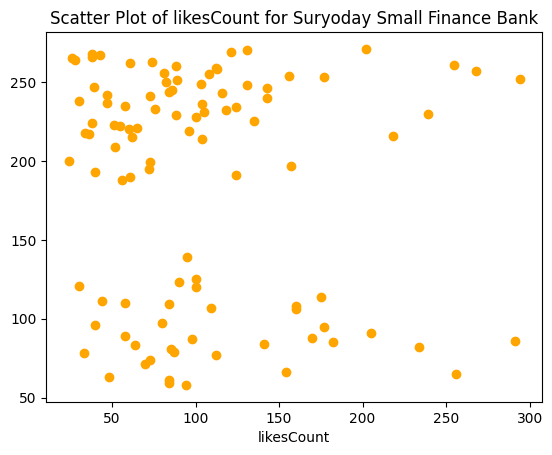

In [216]:
def plot(filtered_data, owner_full_name):
    plt.scatter(filtered_data['likesCount'], filtered_data.index, color='orange')
    plt.title(f'Scatter Plot of likesCount for {owner_full_name}')
    plt.xlabel('likesCount')
    plt.show()

for owner_full_name in data['ownerFullName'].unique():
    filtered_data = data[data['ownerFullName'] == owner_full_name]
    plot(filtered_data, owner_full_name)

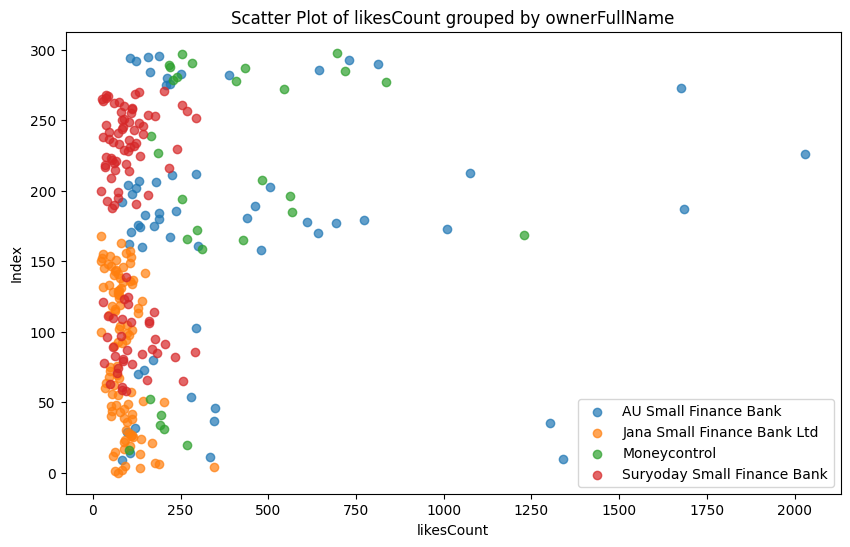

In [217]:
grouped_data = data[data['ownerFullName'] != 'Other'].groupby('ownerFullName')
plt.figure(figsize=(10, 6))  
for owner_full_name, group_data in grouped_data:
    plt.scatter(group_data['likesCount'], group_data.index, label=owner_full_name, alpha=0.7)

plt.title('Scatter Plot of likesCount grouped by ownerFullName')
plt.xlabel('likesCount')
plt.ylabel('Index')
plt.legend()
plt.show()

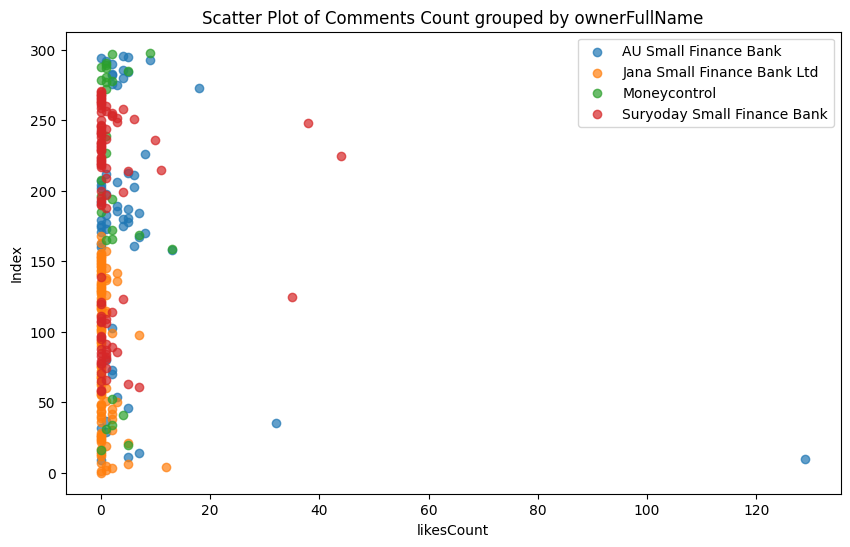

In [218]:
grouped_data = data[data['ownerFullName'] != 'Other'].groupby('ownerFullName')
plt.figure(figsize=(10, 6))  
for owner_full_name, group_data in grouped_data:
    plt.scatter(group_data['commentsCount'], group_data.index, label=owner_full_name, alpha=0.7)

plt.title('Scatter Plot of Comments Count grouped by ownerFullName')
plt.xlabel('likesCount')
plt.ylabel('Index')
plt.legend()
plt.show()

In [219]:
data['type'].unique()

array(['Video', 'Image', 'Sidecar'], dtype=object)

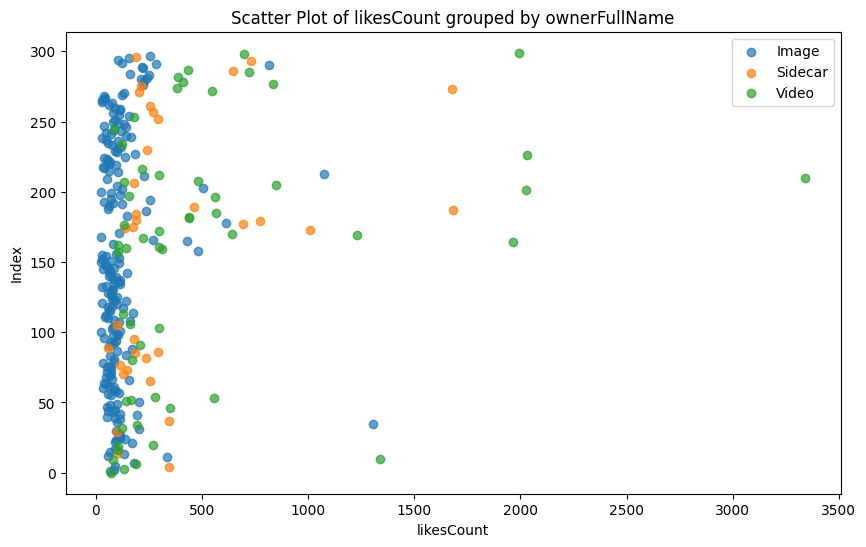

In [220]:
grouped_data = data[data['likesCount']<=10000].groupby('type')
plt.figure(figsize=(10, 6))  
for owner_full_name, group_data in grouped_data:
    plt.scatter(group_data['likesCount'], group_data.index, label=owner_full_name, alpha=0.7)

plt.title('Scatter Plot of likesCount grouped by ownerFullName')
plt.xlabel('likesCount')
plt.ylabel('Index')
plt.legend()
plt.show()

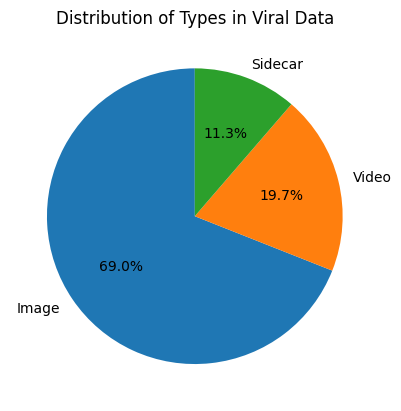

In [221]:
type_counts = data['type'].value_counts()

# Plot a pie chart
type_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Types in Viral Data')
plt.ylabel('')  
plt.show()


In [222]:
from collections import Counter
import re


all_captions = ' '.join(data['caption'].astype(str))

hashtags = re.findall(r'#\w+', all_captions)

hashtags_counter = Counter(hashtags)

hashtags_dict = dict(hashtags_counter)

# Print the resulting dictionary
print(hashtags_dict)


{'#janasfb': 5, '#newbranch': 3, '#newbeginnings': 1, '#delhi': 1, '#exclusive': 2, '#savingsaccount': 6, '#banking': 2, '#Gujarat': 6, '#Nadiad': 1, '#grandlaunch': 1, '#JanaSFB': 58, '#debitcards': 2, '#zodiac': 1, '#Exclusive': 1, '#Savingsaccount': 1, '#astrological': 1, '#awareness': 1, '#action': 1, '#cancer': 1, '#worldcancerday': 1, '#quarterlyresults': 1, '#financialperformance': 1, '#BadlaavHumseHai': 45, '#SochBadloAurBankBhi': 3, '#ad': 1, '#ZeroDiscriminationDay': 1, '#EmployeeAppreciationDay': 1, '#AUSmallFinanceBank': 50, '#SavingsAccount': 1, '#VideoBanking': 1, '#AU0101': 2, '#DunandBradstreetAward': 1, '#janahitmeinjaari': 1, '#ConsumerAwareness': 11, '#staysafe': 1, '#freedomfromfrauds': 1, '#securebanking': 1, '#safebanking': 1, '#FinancialLiteracyWeek': 3, '#StayInformed': 1, '#zodiacsigns': 1, '#Network18': 33, '#Partnered': 28, '#NRI': 3, '#Jana': 2, '#Banking': 35, '#SavingAccount': 6, '#Saving': 2, '#urbanfarming': 1, '#homeandgarden': 1, '#reels': 1, '#reelsin

In [223]:
top_5_frequencies = hashtags_counter.most_common(5)
print(top_5_frequencies)

[('#bankofsmiles', 98), ('#suryodaybank', 97), ('#JanaSFB', 58), ('#AUSmallFinanceBank', 50), ('#BadlaavHumseHai', 45)]


In [224]:
data_jsb=data[data['ownerFullName']=='Jana Small Finance Bank Ltd']
data_au=data[data['ownerFullName']=='AU Small Finance Bank']
data_ssb=data[data['ownerFullName']=='Suryoday Small Finance Bank']

In [225]:
all_captions = ' '.join(data_au['caption'].astype(str))
hashtags = re.findall(r'#\w+', all_captions)
hashtags_counter = Counter(hashtags)
hashtags_dict = dict(hashtags_counter)
print(hashtags_dict)

{'#ZeroDiscriminationDay': 1, '#EmployeeAppreciationDay': 1, '#AUSmallFinanceBank': 48, '#SochBadloAurBankBhi': 1, '#BadlaavHumseHai': 9, '#SavingsAccount': 1, '#VideoBanking': 1, '#AU0101': 2, '#DunandBradstreetAward': 1, '#FinancialLiteracyWeek': 3, '#StayInformed': 1, '#SafeBanking': 6, '#BankSafeBankSmart': 1, '#Changemakers': 1, '#CatMeme': 1, '#CatLovers': 1, '#TagAFriend': 1, '#AUJaipurMarathon': 5, '#BeJaipurLegend': 3, '#AUJM2024': 4, '#FinancialAdWISE': 1, '#Blogs': 1, '#TaxSavings': 1, '#StartInvesting': 1, '#WorldNGODay': 1, '#AUFoundation': 2, '#Alert': 1, '#BrandTune': 1, '#Music': 1, '#BankingInnovation': 1, '#TechnologyExcellence': 1, '#IBA': 1, '#HappyPizzaDay': 1, '#AUDebitandCreditCards': 1, '#AUCards': 3, '#OvenStory': 1, '#BankingLoveLanguage': 1, '#APKFraud': 1, '#Beware': 1, '#StayAlert': 1, '#ValentinesDay': 2, '#NationalGirlsandWomeninSportsDay': 1, '#FutureChampions': 1, '#BanoChampion': 7, '#SafetyPartnership': 1, '#CommunitySupport': 1, '#WorliPolice': 1, '#

[('#AUSmallFinanceBank', 48), ('#BadlaavHumseHai', 9), ('#BanoChampion', 7), ('#SafeBanking', 6), ('#AUJaipurMarathon', 5)]
[('#AUSmallFinanceBank', 48), ('#BadlaavHumseHai', 9), ('#BanoChampion', 7), ('#SafeBanking', 6), ('#AUJaipurMarathon', 5)]


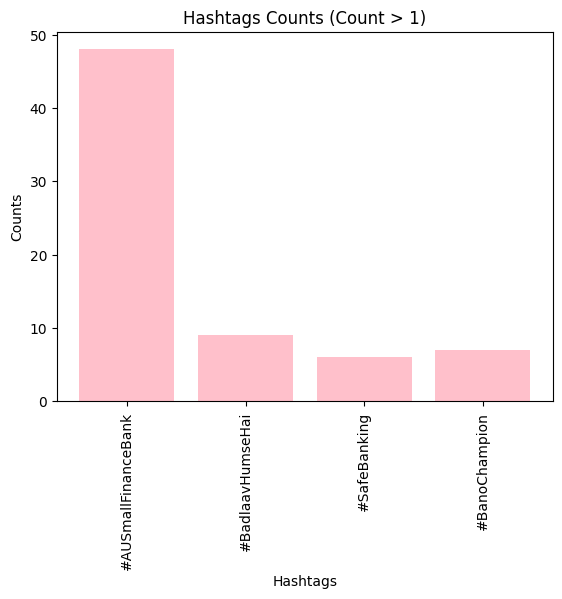

In [226]:
top_5_frequencies = hashtags_counter.most_common(5)
print(top_5_frequencies)
print(top_5_frequencies)
top_5_frequencies = {k: v for k, v in hashtags_dict.items() if v > 5}

words = list(top_5_frequencies.keys())
counts = list(top_5_frequencies.values())

# Plot the bar chart
plt.bar(words, counts, color='pink')
plt.xlabel('Hashtags')
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.title('Hashtags Counts (Count > 1)')
plt.show()

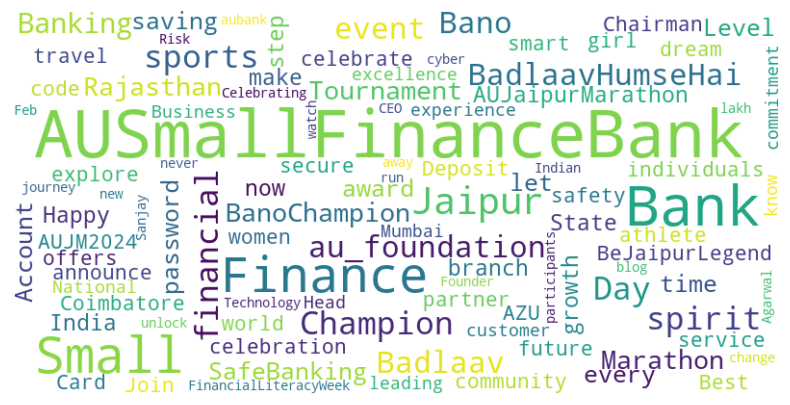

In [227]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    min_word_length=3,  # Minimum word length
    max_words=100,      # Maximum number of words
    collocations=False  # Disable collocations
).generate(all_captions)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [228]:
all_captions = ' '.join(data_jsb['caption'].astype(str))
hashtags = re.findall(r'#\w+', all_captions)
hashtags_counter = Counter(hashtags)
hashtags_dict = dict(hashtags_counter)
print(hashtags_dict)

{'#janasfb': 5, '#newbranch': 2, '#newbeginnings': 1, '#delhi': 1, '#exclusive': 2, '#savingsaccount': 2, '#banking': 2, '#Gujarat': 6, '#Nadiad': 1, '#grandlaunch': 1, '#JanaSFB': 58, '#debitcards': 2, '#zodiac': 1, '#Exclusive': 1, '#Savingsaccount': 1, '#astrological': 1, '#awareness': 1, '#action': 1, '#cancer': 1, '#worldcancerday': 1, '#quarterlyresults': 1, '#financialperformance': 1, '#janahitmeinjaari': 1, '#ConsumerAwareness': 11, '#staysafe': 1, '#freedomfromfrauds': 1, '#securebanking': 1, '#safebanking': 1, '#zodiacsigns': 1, '#NRI': 2, '#Jana': 2, '#Banking': 35, '#SavingAccount': 6, '#Saving': 2, '#BikeLoans': 2, '#TwoWheelerLoans': 2, '#DreamsOnTwoWheels': 1, '#JanaSFBRides': 1, '#republicday2024': 1, '#26thjanuary2024': 1, '#india': 1, '#NewLaunch': 6, '#Jaipur': 1, '#Rajasthan': 2, '#netajijayanti': 1, '#salutetonetaji': 1, '#freedomfighter': 1, '#MakarSankranti': 1, '#Pongal': 1, '#HarvestSeason': 1, '#Farming': 1, '#YouthDay': 1, '#InfinitePossibilities': 1, '#Natio

[('#JanaSFB', 58), ('#Banking', 35), ('#JanaSmallFinanceBank', 13), ('#ConsumerAwareness', 11), ('#JanaHitMeinJaari', 10)]
[('#JanaSFB', 58), ('#Banking', 35), ('#JanaSmallFinanceBank', 13), ('#ConsumerAwareness', 11), ('#JanaHitMeinJaari', 10)]


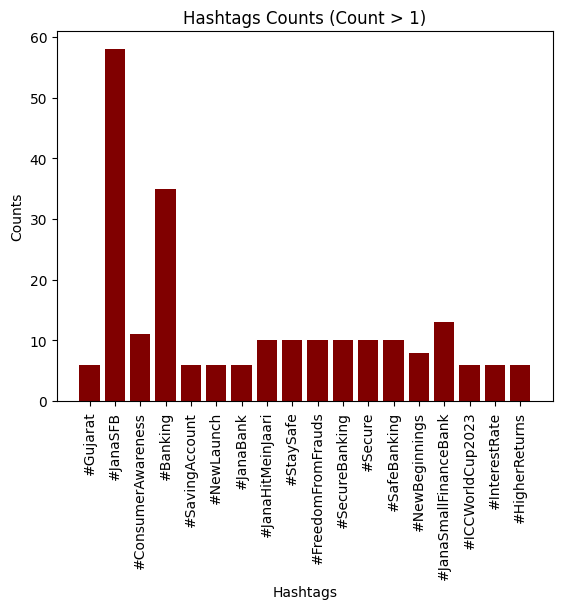

In [229]:
top_5_frequencies = hashtags_counter.most_common(5)
print(top_5_frequencies)
print(top_5_frequencies)
top_5_frequencies = {k: v for k, v in hashtags_dict.items() if v > 5}

words = list(top_5_frequencies.keys())
counts = list(top_5_frequencies.values())

# Plot the bar chart
plt.bar(words, counts, color='Maroon')
plt.xlabel('Hashtags')
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.title('Hashtags Counts (Count > 1)')
plt.show()

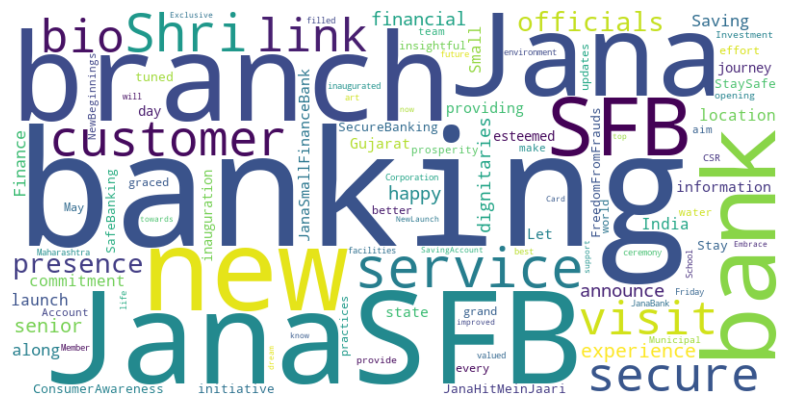

In [230]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    min_word_length=3,  # Minimum word length
    max_words=100,      # Maximum number of words
    collocations=False  # Disable collocations
).generate(all_captions)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [231]:
all_captions = ' '.join(data_ssb['caption'].astype(str))
hashtags = re.findall(r'#\w+', all_captions)
hashtags_counter = Counter(hashtags)
hashtags_dict = dict(hashtags_counter)
print(hashtags_dict)

{'#mandya': 1, '#karnataka': 1, '#branchlaunch': 4, '#launch': 4, '#suryodaybank': 97, '#bankofsmiles': 98, '#goregaon': 1, '#mumbai': 6, '#DICGC': 2, '#deposits': 2, '#insurance': 4, '#security': 3, '#BPGC': 1, '#golf': 1, '#tournament': 1, '#chhatrapatishivajimaharaj': 1, '#shivajijayanti': 1, '#lap': 2, '#loans': 5, '#business': 3, '#tourism': 2, '#contest': 8, '#winners': 5, '#swachhbharatabhiyaan': 1, '#cleanliness': 1, '#activity': 2, '#nmmc': 2, '#navimumbai': 7, '#fixeddeposit': 4, '#investment': 6, '#deposit': 6, '#savings': 7, '#futuregoals': 2, '#financialplanning': 2, '#newpanvel': 1, '#vasantpanchami': 1, '#festive': 1, '#yoga': 1, '#fitness': 1, '#saynotoplastic': 1, '#suryathon': 1, '#NationalWomensDay': 1, '#SarojiniNaidu': 1, '#BirthAnniversary': 1, '#SuryodayBank': 1, '#quaterlyresults': 2, '#raheja': 1, '#chembur': 1, '#cricket': 1, '#run4flamingos': 3, '#csr': 1, '#marathon': 2, '#running': 2, '#wanderingsoulsindia': 2, '#savenavimumbaienvironment': 2, '#nerul': 2, 

[('#bankofsmiles', 98), ('#suryodaybank', 97), ('#celebrations', 12), ('#newyear', 11), ('#resolution', 10)]
[('#bankofsmiles', 98), ('#suryodaybank', 97), ('#celebrations', 12), ('#newyear', 11), ('#resolution', 10)]


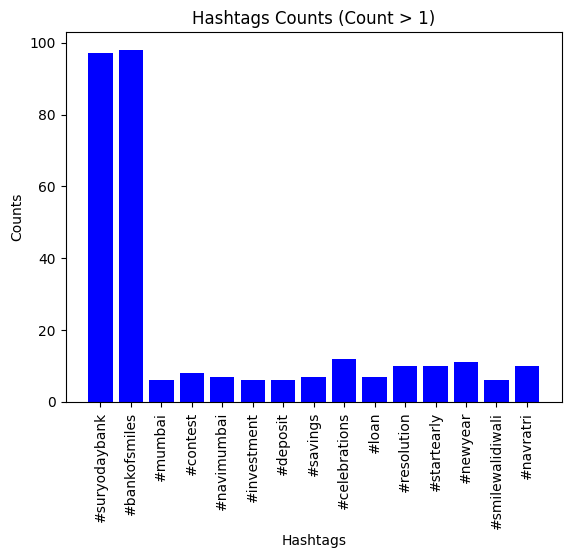

In [232]:
top_5_frequencies = hashtags_counter.most_common(5)
print(top_5_frequencies)
print(top_5_frequencies)
top_5_frequencies = {k: v for k, v in hashtags_dict.items() if v > 5}

words = list(top_5_frequencies.keys())
counts = list(top_5_frequencies.values())

# Plot the bar chart
plt.bar(words, counts, color='blue')
plt.xlabel('Hashtags')
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.title('Hashtags Counts (Count > 1)')
plt.show()

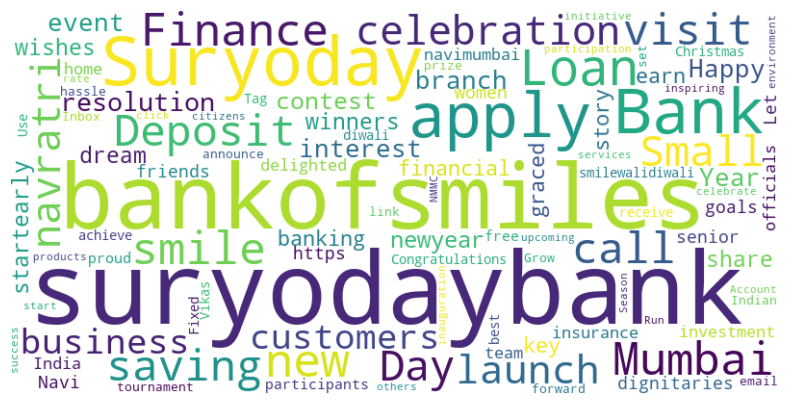

In [233]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    min_word_length=3,  # Minimum word length
    max_words=100,      # Maximum number of words
    collocations=False  # Disable collocations
).generate(all_captions)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [234]:
data.head()

,caption,commentsCount,displayUrl,inputUrl,likesCount,ownerFullName,timestamp,type,url,Language_Category
0,Introducing Our New and state-of-the-art branc...,0,https://instagram.fltn3-2.fna.fbcdn.net/v/t51....,https://www.instagram.com/jana_small_finance_b...,73,Jana Small Finance Bank Ltd,2024-03-02T05:39:49.000Z,Video,https://www.instagram.com/p/C4ABqShJPid/,2
1,Step into a realm of unmatched luxury with Exc...,0,https://scontent-lga3-1.cdninstagram.com/v/t51...,https://www.instagram.com/jana_small_finance_b...,64,Jana Small Finance Bank Ltd,2024-02-21T09:51:49.000Z,Image,https://www.instagram.com/p/C3muwNsoymx/,2
2,We're thrilled to announce the grand relaunch ...,1,https://scontent-mad2-1.cdninstagram.com/v/t51...,https://www.instagram.com/jana_small_finance_b...,84,Jana Small Finance Bank Ltd,2024-02-25T04:42:17.000Z,Image,https://www.instagram.com/p/C3wegkVIfmJ/,2
3,Unveiling RuPay Zodiac Debit Cards for Exclusi...,2,https://instagram.fbog14-1.fna.fbcdn.net/v/t51...,https://www.instagram.com/jana_small_finance_b...,134,Jana Small Finance Bank Ltd,2024-02-22T10:49:44.000Z,Video,https://www.instagram.com/p/C3paBEIJh-h/,2
4,🎉 Today marks a historic day for us at @jana_s...,12,https://instagram.flwo4-2.fna.fbcdn.net/v/t51....,https://www.instagram.com/jana_small_finance_b...,344,Jana Small Finance Bank Ltd,2024-02-14T08:15:43.000Z,Sidecar,https://www.instagram.com/p/C3UiMJqM2rP/,2


In [235]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

data['day'] = data['timestamp'].dt.day_name()
data['hour'] = data['timestamp'].dt.hour

def get_time_range(hour):
    next_hour = (hour + 1) % 24  # Calculate the next hour, considering 24-hour format
    return f'{hour}-{next_hour}'

# Apply the function to create the time_range column
data['time_range'] = data['hour'].apply(get_time_range)

# Display the updated DataFrame
print(data[['timestamp', 'day', 'hour', 'time_range']])

                    timestamp        day  hour time_range
0   2024-03-02 05:39:49+00:00   Saturday     5        5-6
1   2024-02-21 09:51:49+00:00  Wednesday     9       9-10
2   2024-02-25 04:42:17+00:00     Sunday     4        4-5
3   2024-02-22 10:49:44+00:00   Thursday    10      10-11
4   2024-02-14 08:15:43+00:00  Wednesday     8        8-9
..                        ...        ...   ...        ...
295 2024-01-07 14:00:33+00:00     Sunday    14      14-15
296 2024-01-06 14:00:31+00:00   Saturday    14      14-15
297 2024-01-07 10:41:33+00:00     Sunday    10      10-11
298 2024-01-08 04:50:17+00:00     Monday     4        4-5
299 2024-01-21 08:33:37+00:00     Sunday     8        8-9

[300 rows x 4 columns]


In [236]:
data.head()

,caption,commentsCount,displayUrl,inputUrl,likesCount,ownerFullName,timestamp,type,url,Language_Category,day,hour,time_range
0,Introducing Our New and state-of-the-art branc...,0,https://instagram.fltn3-2.fna.fbcdn.net/v/t51....,https://www.instagram.com/jana_small_finance_b...,73,Jana Small Finance Bank Ltd,2024-03-02 05:39:49+00:00,Video,https://www.instagram.com/p/C4ABqShJPid/,2,Saturday,5,5-6
1,Step into a realm of unmatched luxury with Exc...,0,https://scontent-lga3-1.cdninstagram.com/v/t51...,https://www.instagram.com/jana_small_finance_b...,64,Jana Small Finance Bank Ltd,2024-02-21 09:51:49+00:00,Image,https://www.instagram.com/p/C3muwNsoymx/,2,Wednesday,9,9-10
2,We're thrilled to announce the grand relaunch ...,1,https://scontent-mad2-1.cdninstagram.com/v/t51...,https://www.instagram.com/jana_small_finance_b...,84,Jana Small Finance Bank Ltd,2024-02-25 04:42:17+00:00,Image,https://www.instagram.com/p/C3wegkVIfmJ/,2,Sunday,4,4-5
3,Unveiling RuPay Zodiac Debit Cards for Exclusi...,2,https://instagram.fbog14-1.fna.fbcdn.net/v/t51...,https://www.instagram.com/jana_small_finance_b...,134,Jana Small Finance Bank Ltd,2024-02-22 10:49:44+00:00,Video,https://www.instagram.com/p/C3paBEIJh-h/,2,Thursday,10,10-11
4,🎉 Today marks a historic day for us at @jana_s...,12,https://instagram.flwo4-2.fna.fbcdn.net/v/t51....,https://www.instagram.com/jana_small_finance_b...,344,Jana Small Finance Bank Ltd,2024-02-14 08:15:43+00:00,Sidecar,https://www.instagram.com/p/C3UiMJqM2rP/,2,Wednesday,8,8-9


In [237]:
data_au['timestamp'] = pd.to_datetime(data['timestamp'])

data_au['day'] = data_au['timestamp'].dt.day_name()
data_au['hour'] = data_au['timestamp'].dt.hour

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_32776/1788099944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_au['timestamp'] = pd.to_datetime(data['timestamp'])
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_32776/1788099944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_au['day'] = data_au['timestamp'].dt.day_name()
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_32776/1788099944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [238]:
data_jsb['timestamp'] = pd.to_datetime(data_jsb['timestamp'])

data_jsb['day'] = data_jsb['timestamp'].dt.day_name()
data_jsb['hour'] = data_jsb['timestamp'].dt.hour

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_32776/1753349911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jsb['timestamp'] = pd.to_datetime(data_jsb['timestamp'])
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_32776/1753349911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jsb['day'] = data_jsb['timestamp'].dt.day_name()
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_32776/1753349911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a 

In [239]:
data_ssb['timestamp'] = pd.to_datetime(data_ssb['timestamp'])

data_ssb['day'] = data_ssb['timestamp'].dt.day_name()
data_ssb['hour'] = data_ssb['timestamp'].dt.hour

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_32776/2639117985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ssb['timestamp'] = pd.to_datetime(data_ssb['timestamp'])
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_32776/2639117985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ssb['day'] = data_ssb['timestamp'].dt.day_name()
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_32776/2639117985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a 

In [240]:
def plot_likes_count_by_day(data,color):
    grouped_data = data.groupby('day')['likesCount'].median().reset_index()
    plt.bar(grouped_data['day'], grouped_data['likesCount'], color=color)
    plt.title('LikesCount by Day')
    plt.xlabel('Day')
    plt.ylabel('Total LikesCount')
    plt.show()

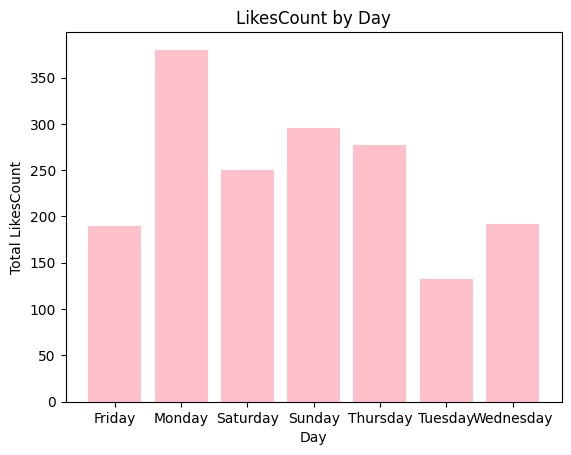

In [241]:
plot_likes_count_by_day(data_au,'pink')

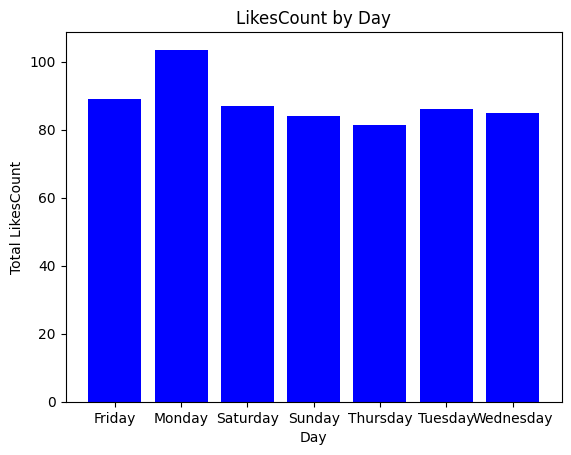

In [242]:
plot_likes_count_by_day(data_ssb,'blue')

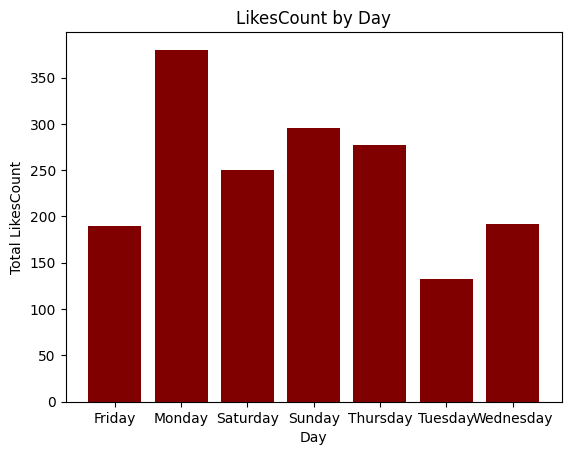

In [243]:
plot_likes_count_by_day(data_au,'maroon')

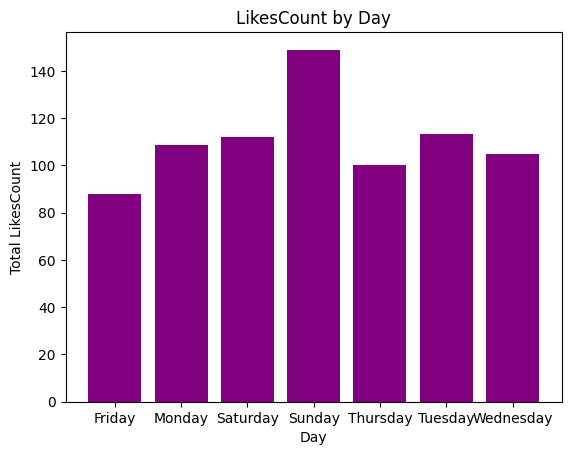

In [244]:
plot_likes_count_by_day(data,'purple')

In [255]:
def plot_likes_count_by_time(data,color):
    grouped_data = data.groupby('hour')['likesCount'].mean().reset_index()
    plt.bar(grouped_data['hour'], grouped_data['likesCount'], color=color)
    plt.title('LikesCount by Time')
    plt.xlabel('Day')
    plt.ylabel('Total LikesCount')
    plt.show()

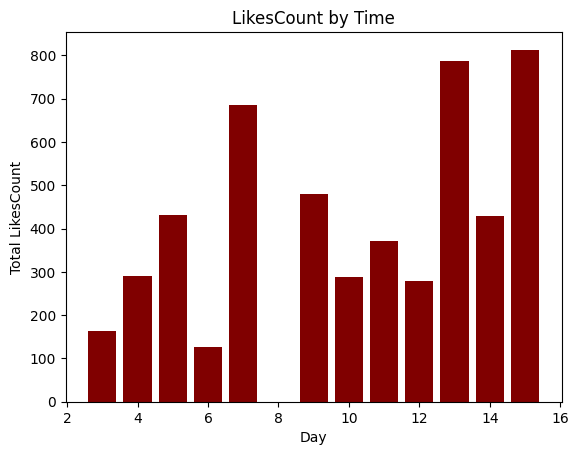

In [256]:
plot_likes_count_by_time(data_au,'maroon')

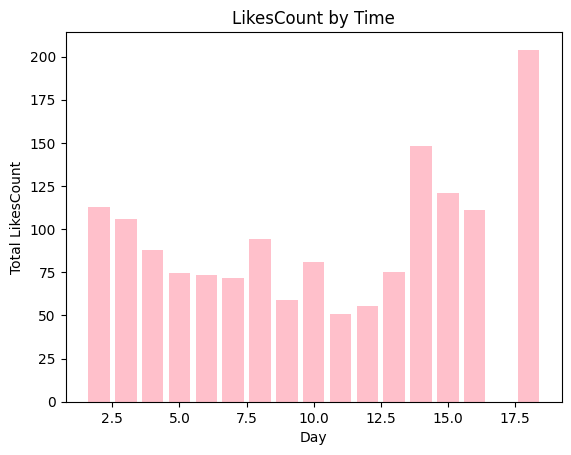

In [257]:
plot_likes_count_by_time(data_jsb,'pink')

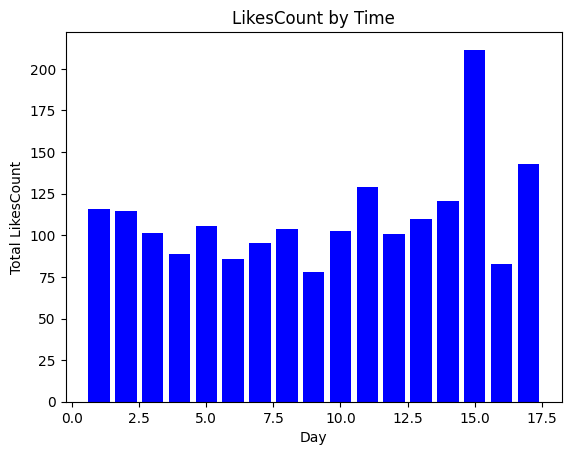

In [258]:
plot_likes_count_by_time(data_ssb,'blue')

In [265]:
grouped_data = data_au.groupby(['day', 'hour'])['likesCount'].mean().reset_index()
sorted_data = grouped_data.sort_values(by='likesCount', ascending=False)
top_predictions = sorted_data.head(5)
print("Top 5 Best Time and Day to Post on Instagram for AU Small Finance Bank:")
print(top_predictions[['day', 'hour', 'likesCount']])

Top 5 Best Time and Day to Post on Instagram for AU Small Finance Bank:
          day  hour  likesCount
21     Sunday    13      1676.0
7      Monday     4      1340.0
5      Friday    13      1189.5
10     Monday     7      1075.0
42  Wednesday    14      1014.5


In [266]:
grouped_data = data_ssb.groupby(['day', 'hour'])['likesCount'].mean().reset_index()
sorted_data = grouped_data.sort_values(by='likesCount', ascending=False)
top_predictions = sorted_data.head(5)
print("Top 5 Best Time and Day to Post on Instagram for Suryoday Small Finance Bank:")
print(top_predictions[['day', 'hour', 'likesCount']])

Top 5 Best Time and Day to Post on Instagram for Suryoday Small Finance Bank:
         day  hour  likesCount
18    Monday    12       268.0
50   Tuesday    15       211.5
29    Sunday     6       187.5
23  Saturday     9       182.0
47   Tuesday    10       175.0


In [267]:
grouped_data = data_jsb.groupby(['day', 'hour'])['likesCount'].mean().reset_index()
sorted_data = grouped_data.sort_values(by='likesCount', ascending=False)
top_predictions = sorted_data.head(5)
print("Top 5 Best Time and Day to Post on Instagram for Jana Small Finance Bank:")
print(top_predictions[['day', 'hour', 'likesCount']])

Top 5 Best Time and Day to Post on Instagram for Jana Small Finance Bank:
          day  hour  likesCount
33     Sunday    18       204.0
54  Wednesday     8       196.0
28   Saturday    14       148.0
39   Thursday    10       134.0
10     Friday    15       133.0


In [268]:
grouped_data = data.groupby(['day', 'hour'])['likesCount'].mean().reset_index()
sorted_data = grouped_data.sort_values(by='likesCount', ascending=False)
top_predictions = sorted_data.head(5)
print("Top 5 Best Time and Day to Post on Instagram:")
print(top_predictions[['day', 'hour', 'likesCount']])

Top 5 Best Time and Day to Post on Instagram:
         day  hour  likesCount
70   Tuesday     4     47312.0
32  Saturday     6     35334.5
33  Saturday     7      4335.0
50    Sunday    13      1676.0
46    Sunday     8      1123.0


In [269]:
data[data['hour']<=6][['timestamp','hour']]

,timestamp,hour
0,2024-03-02 05:39:49+00:00,5
2,2024-02-25 04:42:17+00:00,4
5,2024-02-04 02:47:23+00:00,2
7,2024-02-13 04:15:21+00:00,4
8,2023-11-04 06:21:14+00:00,6
...,...,...
289,2024-01-09 05:31:11+00:00,5
291,2024-01-13 06:49:00+00:00,6
293,2024-01-12 04:31:15+00:00,4
294,2024-01-12 03:30:20+00:00,3


In [270]:
data.head()

,caption,commentsCount,displayUrl,inputUrl,likesCount,ownerFullName,timestamp,type,url,Language_Category,day,hour,time_range
0,Introducing Our New and state-of-the-art branc...,0,https://instagram.fltn3-2.fna.fbcdn.net/v/t51....,https://www.instagram.com/jana_small_finance_b...,73,Jana Small Finance Bank Ltd,2024-03-02 05:39:49+00:00,Video,https://www.instagram.com/p/C4ABqShJPid/,2,Saturday,5,5-6
1,Step into a realm of unmatched luxury with Exc...,0,https://scontent-lga3-1.cdninstagram.com/v/t51...,https://www.instagram.com/jana_small_finance_b...,64,Jana Small Finance Bank Ltd,2024-02-21 09:51:49+00:00,Image,https://www.instagram.com/p/C3muwNsoymx/,2,Wednesday,9,9-10
2,We're thrilled to announce the grand relaunch ...,1,https://scontent-mad2-1.cdninstagram.com/v/t51...,https://www.instagram.com/jana_small_finance_b...,84,Jana Small Finance Bank Ltd,2024-02-25 04:42:17+00:00,Image,https://www.instagram.com/p/C3wegkVIfmJ/,2,Sunday,4,4-5
3,Unveiling RuPay Zodiac Debit Cards for Exclusi...,2,https://instagram.fbog14-1.fna.fbcdn.net/v/t51...,https://www.instagram.com/jana_small_finance_b...,134,Jana Small Finance Bank Ltd,2024-02-22 10:49:44+00:00,Video,https://www.instagram.com/p/C3paBEIJh-h/,2,Thursday,10,10-11
4,🎉 Today marks a historic day for us at @jana_s...,12,https://instagram.flwo4-2.fna.fbcdn.net/v/t51....,https://www.instagram.com/jana_small_finance_b...,344,Jana Small Finance Bank Ltd,2024-02-14 08:15:43+00:00,Sidecar,https://www.instagram.com/p/C3UiMJqM2rP/,2,Wednesday,8,8-9
